In [21]:
# %pip install simpleaudio

# Imports

In [22]:
from skimage import io,color
import matplotlib.pyplot as plt
import numpy as np
import pickle
from itertools import product
import simpleaudio as sa
from scipy.io.wavfile import write
import pprint

# Algoritmo de Huffman

In [23]:

# A class that will help to work with Huffman Tree
class Node:
    def __init__(self, prob, symbol, left=None, right=None):
        # probability of symbol
        self.prob = prob

        # symbol 
        self.symbol = symbol

        # left node
        self.left = left

        # right node
        self.right = right

        # tree direction (0/1)
        self.code = ''

""" A helper function to print the codes of symbols by traveling Huffman Tree"""
codes = dict()

def Calculate_Codes(node, val=''):
    # huffman code for current node
    newVal = val + str(node.code)

    if(node.left):
        Calculate_Codes(node.left, newVal)
    if(node.right):
        Calculate_Codes(node.right, newVal)

    if(not node.left and not node.right):
        codes[node.symbol] = newVal
    return codes        


""" A helper function to calculate the probabilities of symbols in given data"""
def Calculate_Probability(data):
    symbols = dict()
    for element in data:
        if symbols.get(element) == None:
            symbols[element] = 1
        else: 
            symbols[element] += 1     
    return symbols

""" A helper function to obtain the encoded output"""
def Output_Encoded(data, coding):
    encoding_output = []
    for c in data:
      #  print(coding[c], end = '')
        encoding_output.append(coding[c])
        
    string = ''.join([str(item) for item in encoding_output])    
    return string
        
""" A helper function to calculate the space difference between compressed and non compressed data"""    
def Total_Gain(data, coding):
    before_compression = len(data) * 8 # total bit space to stor the data before compression
    after_compression = 0
    symbols = coding.keys()
    for symbol in symbols:
        count = data.count(symbol)
        after_compression += count * len(coding[symbol]) #calculate how many bit is required for that symbol in total
    print("Space usage before compression (in bits):", before_compression)    
    print("Space usage after compression (in bits):",  after_compression)           

def Huffman_Encoding(data):
    symbol_with_probs = Calculate_Probability(data)
    symbols = symbol_with_probs.keys()
    probabilities = symbol_with_probs.values()
    # print("symbols: ", symbols)
    # print("probabilities: ", probabilities)
    
    nodes = []
    
    # converting symbols and probabilities into huffman tree nodes
    for symbol in symbols:
        nodes.append(Node(symbol_with_probs.get(symbol), symbol))
    
    while len(nodes) > 1:
        # sort all the nodes in ascending order based on their probability
        nodes = sorted(nodes, key=lambda x: x.prob)
        # for node in nodes:  
        #      print(node.symbol, node.prob)
    
        # pick 2 smallest nodes
        right = nodes[0]
        left = nodes[1]
    
        left.code = 0
        right.code = 1
    
        # combine the 2 smallest nodes to create new node
        newNode = Node(left.prob+right.prob, left.symbol+right.symbol, left, right)
    
        nodes.remove(left)
        nodes.remove(right)
        nodes.append(newNode)
    
    huffman_encoding = Calculate_Codes(nodes[0])
    #print("symbols with codes", huffman_encoding)
    Total_Gain(data, huffman_encoding)
    encoded_output = Output_Encoded(data,huffman_encoding)
    return encoded_output, nodes[0],huffman_encoding
    

def Huffman_Decoding(encoded_data, huffman_tree):
    tree_head = huffman_tree
    decoded_output = []
    for x in encoded_data:
        if x == '1':
            huffman_tree = huffman_tree.right   
        elif x == '0':
            huffman_tree = huffman_tree.left
        try:
            if huffman_tree.left.symbol == None and huffman_tree.right.symbol == None:
                pass
        except AttributeError:
            decoded_output.append(huffman_tree.symbol)
            huffman_tree = tree_head
        
    string = ''.join([str(item) for item in decoded_output])
    return string  

# Codificando la imagen usando la codificación de Huffman

### Importando Imagen y Convirtiendola a Blanco y Negro



.............CODIFICANDO............


Dimensiones de la imagen a color:
(225, 225, 3)


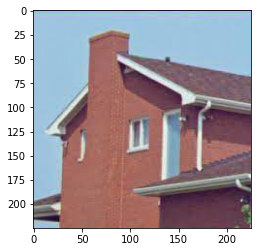

Dimensiones de la imagen a blanco y negro:
(225, 225)


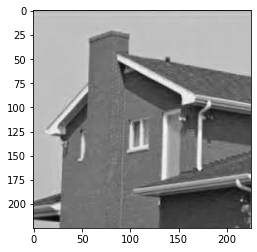

imagen a blanco y negro Final:


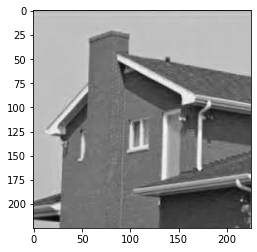

In [24]:
print ("\n\n.............CODIFICANDO............\n\n")

# print("Encoded output", encodeText)
# print("Decoded Output", Huffman_Decoding(encodeText,tree1))

image=io.imread("img_house.jpeg")

print("Dimensiones de la imagen a color:")
print(image.shape)
plt.imshow(image)
plt.show()
gray_image=color.rgb2gray(image)

print("Dimensiones de la imagen a blanco y negro:")
print(gray_image.shape)
plt.imshow(gray_image,cmap='gray')
plt.show()

print("imagen a blanco y negro Final:")
# Dejamos el arreglo de imagenes entre 0 y 255
gray_image=gray_image*255
plt.imshow(gray_image,cmap='gray')
plt.show()

### Reduciendo Dimensionalidad

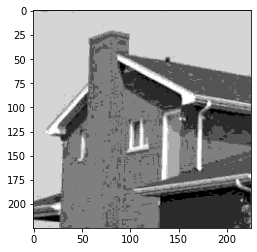

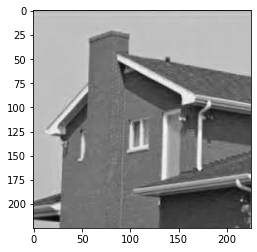

In [25]:
img=gray_image

#Reduccion de la dimensionalidad de la imagen
min=img.min()
max=img.max()
diferencia=7

img_adj=np.zeros(np.shape(img),dtype=int)

for i in range(len(img_adj)):
    for j in range(len(img_adj[i])):
        img_adj[i,j]= int((diferencia)*(img[i,j]- min)/(max-min))
#Reescalando
img_final=np.zeros(np.shape(img_adj),dtype=int) 
for i in range(len(img_adj)):
    for j in range(len(img_adj[i])):
        img_final[i,j]=int(img_adj[i,j]*(max-min)/diferencia + min)

plt.imshow(img_final,cmap='gray')

plt.show()
plt.imshow(img,cmap='gray')

### Applying Huffman Encoding

In [26]:
img_final=img_final.flatten()
for x in range(len(img_final)):
    img_final[x]=int(round(img_final[x]))
img_final=[ str(e)+" " for e in img_final]
encoding, tree,dic=Huffman_Encoding(img_final)


Space usage before compression (in bits): 405000
Space usage after compression (in bits): 117383


In [27]:
# print(img_final)


### Fsk modulation

In [28]:
# frq #Frecuencia de inicio
# frecdev #Separación entre cada elemento en frecuencia
def fsk(encoding,frq=200,frecdev=30,bits=8):
    # Generando lista de binarios de 8 bits
    lista = list(product(["0","1"], repeat=bits))
    lista =["".join(x)  for x in  lista]

    # Se crea un diccionario donde cada llave es un binario de la lista creada
    dic_freq={}
    for llave in lista:
        dic_freq[llave]=frq
        frq+=frecdev
        
    dic_freq["0"]=frq
    dic_freq["1"]=frq+frecdev
    pos=0
    lista_freq=[]
    while len(encoding)>pos:
        for llave in dic_freq.keys():
            largo=len(llave)
            if encoding[pos:largo+pos]==llave:
                lista_freq.append(dic_freq[llave])
                pos+=largo
                break
    return np.array(lista_freq),dic_freq

### Flattening the image and saving the data

In [29]:

lista_freq,dic_freq=fsk(encoding,frq=310,frecdev=30)
print("las dimenisiones de lista_freq son: ",lista_freq.shape)
# pprint.pprint(lista_freq)
print(lista_freq[0:50])
l=list(set(lista_freq))
l=np.sort(l)
print()

# Using Pickle we save:
# Frequency Dictionary, where the key is the frecuency returned by the Hoffman algorithm
#  and the value is the real Frequency
with open("dic_freq.pickle", "wb") as f:
    pickle.dump(dic_freq, f)


# frequency tree created by the Huffman Algorithm
with open("tree.pickle", "wb") as f:
    pickle.dump(tree, f)



las dimenisiones de lista_freq son:  (14679,)
[7960 7960 7960 7960 7960 7960 7960 7960 7960 7960 7960 7960 7960 7960
 7960 7960 7960 7960 7960 7960 7960 7960 7960 7960 7960 7960 7960 7960
 7960 7960 7960 7960 7960 7960 7960 7960 7960 7960 7960 7960 7960 7960
 7960 7960 7960 7960 7960 7960 7960 7960]



In [30]:
l=list(set(lista_freq))
l=np.sort(l)
print(l)

[ 310  340  370  400  460  490  520  610  640  670  730  760  910  940
  970 1000 1060 1090 1180 1270 1330 1360 1390 1420 1450 1480 1510 1540
 1570 1600 1630 1660 1690 1720 1750 1810 1840 1870 1900 1930 1960 2020
 2050 2080 2110 2140 2170 2200 2230 2260 2290 2350 2380 2470 2500 2530
 2560 2590 2620 2650 2680 2710 2740 2770 2800 2830 2860 2890 2920 2950
 2980 3010 3100 3130 3160 3190 3220 3250 3310 3340 3430 3460 3490 3520
 3580 3610 3640 3670 3730 3760 3790 3820 3880 3940 3970 4000 4030 4060
 4090 4120 4150 4180 4210 4300 4360 4390 4450 4480 4540 4600 4630 4660
 4690 4720 4750 4780 4810 4840 4900 4930 4960 4990 5020 5050 5080 5110
 5170 5260 5290 5320 5350 5380 5410 5440 5470 5500 5530 5560 5590 5620
 5650 5710 5740 5860 5890 5920 5950 5980 6010 6040 6070 6100 6130 6160
 6190 6220 6340 6370 6400 6430 6460 6490 6520 6550 6580 6610 6640 6670
 6700 6730 6760 6850 6910 6940 6970 7000 7030 7120 7150 7180 7240 7270
 7300 7330 7360 7420 7450 7480 7510 7540 7570 7600 7630 7660 7690 7720
 7750 

# Generación del audio

Objetivo: llegar a transmitir todo el audio en 293 segundos

In [55]:

fs = 44100  # 44100 samples per second
seconds = 0.5 # Duracion de cada sonido
t = np.linspace(0, seconds, int(seconds * fs),False,dtype=float)


note = [] # Objeto frecuencia, duracion
amplitude = 0.5
# for x in lista_freq:
#     note.append(amplitude*np.sin(x * t * 2 * np.pi))
# print(np.shape(note))

head=[]
header=[]
for x in [12000,12000,12000,13000,13000,13000,12000,12000,12000,13000,13000,13000]:
    header.append(0.5*np.sin(x * t * 2 * np.pi))

for x in [523,622,784,698,622,523,523,622,784,784,784,698,622,523]:
    head.append(0.5*np.sin(x * t * 2 * np.pi))




In [36]:
# head=[]
# head.append(0.5*np.sin(340 * t * 2 * np.pi))
# head.append(0.5*np.sin(310 * t * 2 * np.pi))

In [56]:
# sampling=np.shape(note)[1]

print(np.shape(header))
print(np.shape(note))
# audio=np.concatenate((header,note))


# scaled = np.int16(audio / np.max(np.abs(audio)) * 32767)
scaled2= np.int16(head / np.max(np.abs(head)) * 32767)
# write('test.wav', fs, scaled)

# data = np.random.uniform(-1, 1, fs) # 1 second worth of random samples between -1 and 1
# scaled = np.int16(data / np.max(np.abs(data)) * 32767)
# print(scaled.shape)

# # Ensure that highest value is in 16-bit range
# audio = sonido_completo * (2**15 - 1) / np.max(np.abs(sonido_completo))
# # Convert to 16-bit data
# audio = audio.astype(np.int16)
# Start playback

# play_obj = sa.play_buffer(scaled, 1, 2, fs)
# wave_obj = sa.WaveObject(scaled, 1, 2, 44100)
play_obj = sa.play_buffer(scaled2, 1, 2, fs)

# # Wait for playback to finish before exiting
play_obj.wait_done()



(12, 22050)
(0,)


In [48]:
if play_obj.is_playing():
   play_obj.stop()